In [46]:
import pandas as pd
import tensorflow as tf

In [47]:
# !pip list

In [48]:
import tensorflow as tf
import os

In [49]:
os.listdir('images')

['brain_tumor_dataset', 'no', 'yes']

In [50]:
# tf.data.Dataset??

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data=tf.keras.utils.image_dataset_from_directory('images/brain_tumor_dataset')

Found 253 files belonging to 2 classes.


In [53]:
# data_iter.next()

In [54]:
data_iter=data.as_numpy_iterator()

In [55]:
batch=data_iter.next()

In [56]:
batch[1]

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

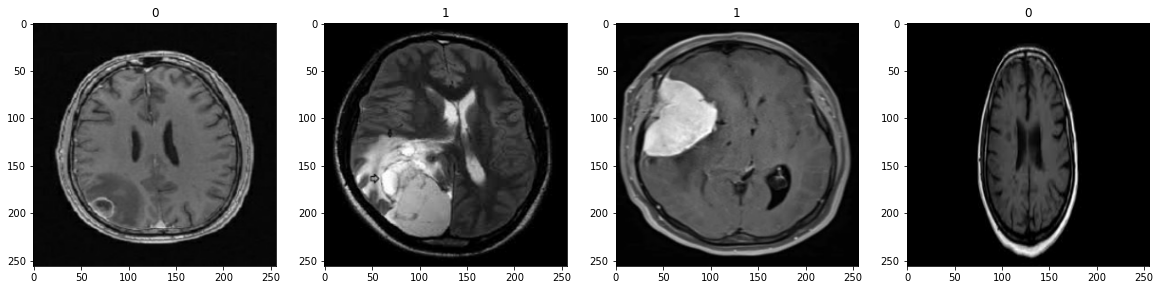

In [57]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [58]:
data= data.map(lambda x, y: (x/255, y))

In [59]:
# data=data.as_numpy_iterator()

In [60]:
# data.next()[0].min()
# data.next()[0].shape

In [61]:
len(data)

8

In [62]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)+1

In [63]:
# train_size+val_size+test_size
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [65]:
model= Sequential()

In [66]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [67]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics='accuracy')

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [69]:
hist=model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
5/5 [==============================] - 11s 2s/step - loss: 0.8530 - accuracy: 0.6562 - val_loss: 0.5362 - val_accuracy: 0.8281
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 0.5569 - accuracy: 0.7563 - val_loss: 0.5183 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.4377 - accuracy: 0.8313 - val_loss: 0.5164 - val_accuracy: 0.7188
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.4456 - accuracy: 0.8000 - val_loss: 0.4952 - val_accuracy: 0.7656
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 0.3996 - accuracy: 0.8250 - val_loss: 0.3337 - val_accuracy: 0.8281
Epoch 6/20
5/5 [==============================] - 8s 1s/step - loss: 0.3833 - accuracy: 0.8313 - val_loss: 0.3593 - val_accuracy: 0.8750
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.3221 - accuracy: 0.8750 - val_loss: 0.3136 - val_accuracy: 0.8594
Epoch 8/20
5/5 [========================

In [70]:
hist.history

{'loss': [0.8529983758926392,
  0.5569154024124146,
  0.43766823410987854,
  0.445601224899292,
  0.39957553148269653,
  0.38328981399536133,
  0.32209569215774536,
  0.28763118386268616,
  0.18962499499320984,
  0.11497900635004044,
  0.17260120809078217,
  0.08379240334033966,
  0.07213400304317474,
  0.06336358934640884,
  0.04270675405859947,
  0.02801058068871498,
  0.0172992255538702,
  0.014396938495337963,
  0.009607206098735332,
  0.007285659201443195],
 'accuracy': [0.65625,
  0.7562500238418579,
  0.831250011920929,
  0.800000011920929,
  0.824999988079071,
  0.831250011920929,
  0.875,
  0.8999999761581421,
  0.9312499761581421,
  0.981249988079071,
  0.925000011920929,
  0.981249988079071,
  0.987500011920929,
  0.96875,
  0.981249988079071,
  0.9937499761581421,
  1.0,
  0.9937499761581421,
  1.0,
  1.0],
 'val_loss': [0.536212682723999,
  0.518339991569519,
  0.516419529914856,
  0.4952159821987152,
  0.33373355865478516,
  0.35927796363830566,
  0.31355345249176025,
  0

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre= Precision()
re=Recall()
acc=BinaryAccuracy() 

In [73]:
for batch in test.as_numpy_iterator():
  x,y=batch
  ypred=model.predict(x)
  pre.update_state(y,ypred)
  re.update_state(y,ypred)
  acc.update_state(y,ypred)

1/1 [==============================] - 1s 618ms/step


In [74]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy: 1.0
